In [4]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score


import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [18]:
df= pd.read_csv(r'C:\\Users\kmmoh\Downloads\diabetes.csv') # Reading the Data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
df.shape

(768, 9)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


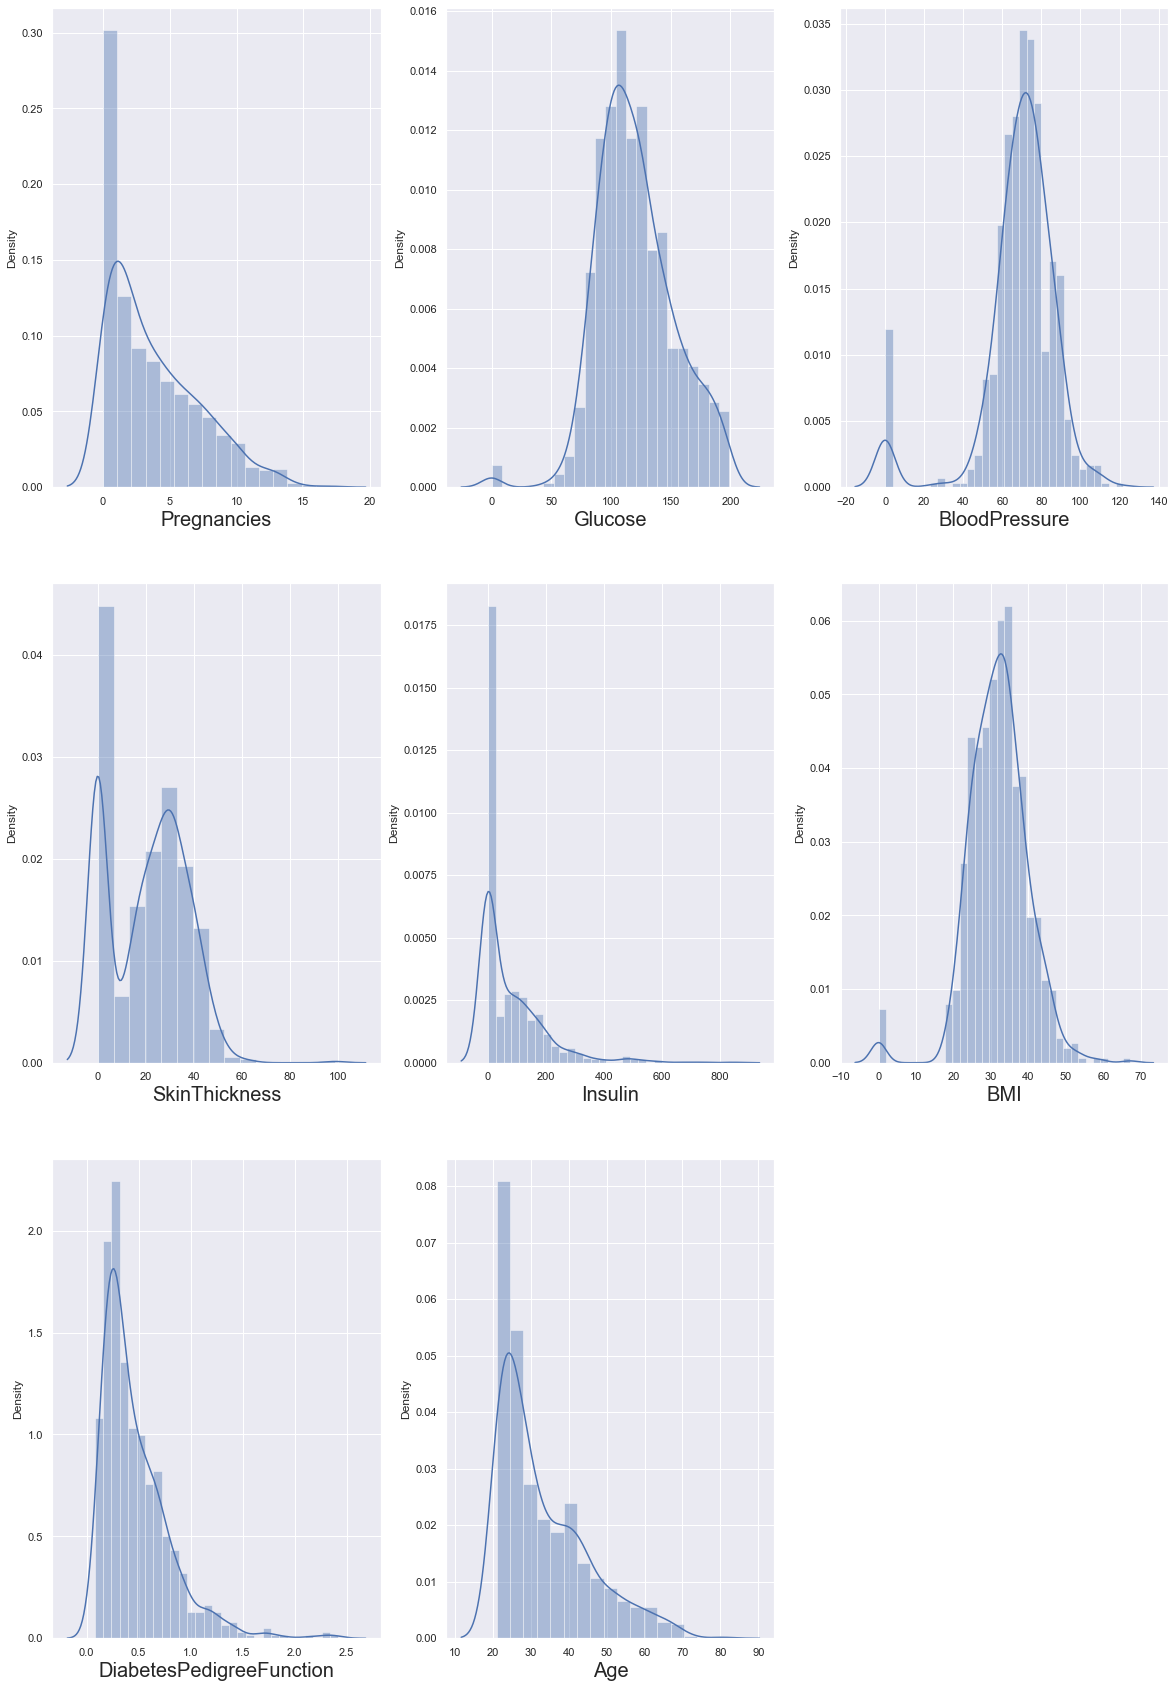

In [19]:
y=df['Outcome']
X=df.drop(columns=['Outcome'], axis =1)
plt.figure(figsize=(20,30),facecolor='white')
plotNo=1
for column in X:
    if plotNo<10 :
        plt.subplot(3,3,plotNo)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
        plotNo+=1
plt.show()

We can see there is some skewness in the data, let's deal with data.

Also, we can see there few data for columns Glucose, Insulin, skin thickness, BMI and Blood Pressure which have value as 0. 
That's not possible. You can do a quick search to see that one cannot have 0 values for these. Let's deal with that. we can
either remove such data or simply replace it with their respective mean values. Let's do the latter.


In [28]:
X.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


In [29]:
col=['Glucose' ,'BloodPressure' ,'SkinThickness', 'Insulin' ,'BMI']
for i in col:
  X[i].replace(0,X[i].mean(),inplace=True)

In [ ]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

All the VIF values are less than 5 and are very low. That means no multicollinearity. Now, we can go ahead with fitting our data to the model. Before that, let's split our data in test and training set.

<AxesSubplot:>

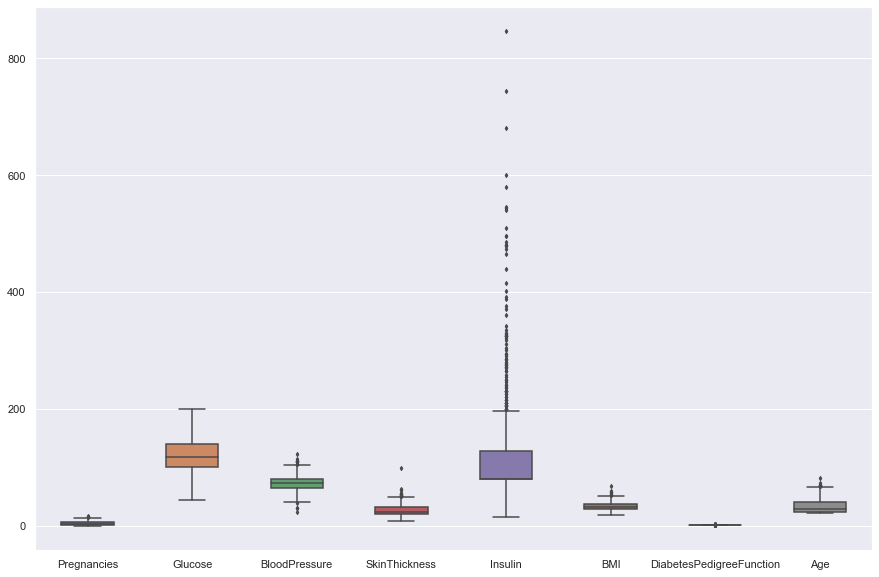

In [30]:
plt.subplots(figsize=(15,10))
sns.boxplot(data=X, width= 0.5, fliersize=3)


In [31]:
df.var()

Pregnancies                    11.354056
Glucose                      1022.248314
BloodPressure                 374.647271
SkinThickness                 254.473245
Insulin                     13281.180078
BMI                            62.159984
DiabetesPedigreeFunction        0.109779
Age                           138.303046
Outcome                         0.227483
dtype: float64

In [32]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [33]:
X_scaled.var()

1.0

<AxesSubplot:ylabel='Outcome'>

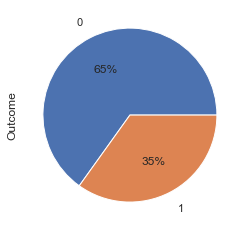

In [50]:
#sns.countplot(data=df['Outcome'])
df['Outcome'].value_counts().plot.pie(autopct='%1.0f%%',labeldistance=1.2)

This target is variable is imbalanced

In [42]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [43]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=1,penalty='l2')
log_reg.fit(X_train,Y_train)

log_acc=accuracy_score(Y_test,log_reg.predict(X_test))


print("Train Set Accuracy:"+str(accuracy_score(Y_train,log_reg.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,log_reg.predict(X_test))*100))

Train Set Accuracy:78.81944444444444
Test Set Accuracy:75.52083333333334


In [58]:
y_pred = log_reg.predict(x_test)

In [83]:
import pickle
# Writing different model files to file
with open( 'LogisticRegressionprediction.sav', 'wb') as f:
    pickle.dump(log_reg,f)
    
with open('standardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)

In [59]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7552083333333334

In [60]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[110,  15],
       [ 32,  35]], dtype=int64)

In [63]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [69]:
recall=true_positive/(true_positive +false_negative )
precision=true_positive/(true_positive +false_positive)
print("recall =",recall)
print("precision=",precision)

recall = 0.7746478873239436
precision= 0.88


In [67]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7552083333333334

In [71]:
F1_score= 2 * ( precision * recall)/(precision + recall)
F1_score

0.8239700374531835

In [72]:
auc=roc_auc_score(y_test, y_pred)
auc

0.7011940298507463

In [73]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

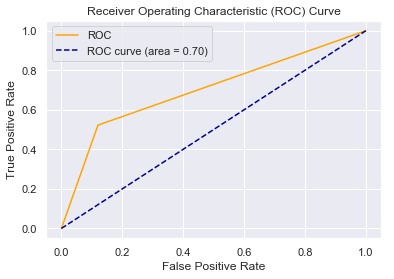

In [80]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()